### Show image

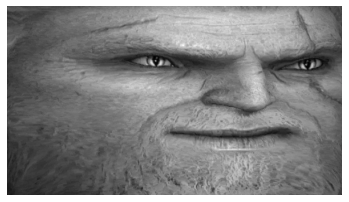

In [2]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("images/wide_gerka.jpg", cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

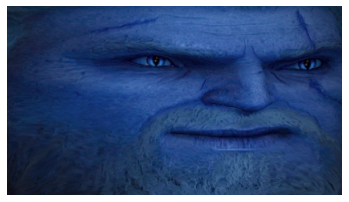

In [8]:
# Load image in color
image_bgr = cv2.imread("images/wide_gerka.jpg", cv2.IMREAD_COLOR)

# Show image
plt.imshow(image_bgr), plt.axis("off")
plt.show()

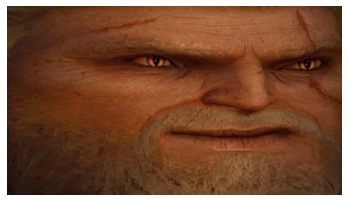

In [36]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Save image

In [10]:
# Save image
cv2.imwrite("images/gray_gerka.jpg", image)

True

### Resize

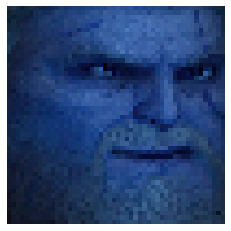

In [11]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image_bgr, (50, 50))

# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

### Crop

In [14]:
image_bgr.shape

(720, 1280, 3)

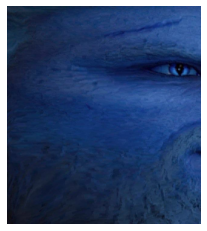

In [26]:
# Select first half of the columns and all rows
image_cropped = image_bgr[:,:640]

# Show image
plt.imshow(image_cropped), plt.axis("off")
plt.show()

### Blur

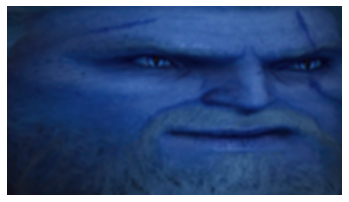

In [27]:
# Blur image
image_blurry = cv2.blur(image_bgr, (15,15))

# Show image
plt.imshow(image_blurry), plt.axis("off")
plt.show()

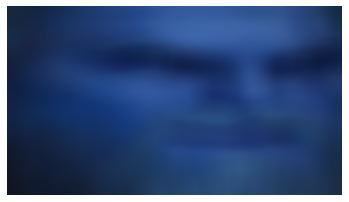

In [28]:
# Blur image
image_very_blurry = cv2.blur(image_bgr, (100,100))

# Show image
plt.imshow(image_very_blurry), plt.axis("off")
plt.show()

In [25]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

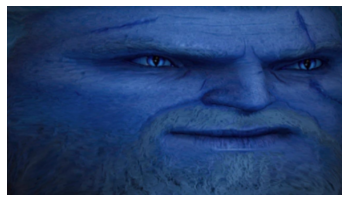

In [29]:
# Apply kernel
image_kernel = cv2.filter2D(image_bgr, -1, kernel)

# Show image
plt.imshow(image_kernel), plt.axis("off")
plt.show()

### Sharp

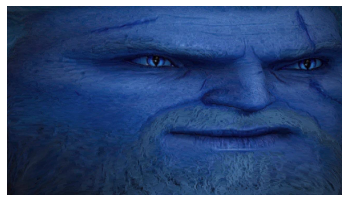

In [30]:
# Create kernel
kernel_shp = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image_bgr, -1, kernel_shp)

# Show image
plt.imshow(image_sharp), plt.axis("off")
plt.show()

### Contrast (only grayscale)

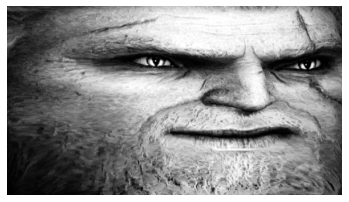

In [33]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

#### When we have a color image, we first need to convert the image to the YUV format

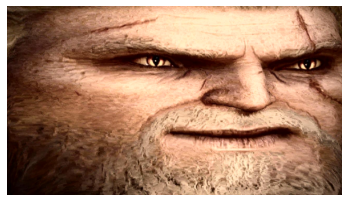

In [34]:
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb2 = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb2), plt.axis("off")
plt.show()

### Isolating Colors

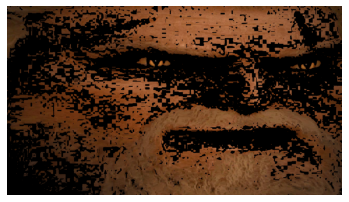

In [51]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_yellow = np.array([11,50,50])
upper_yellow = np.array([30,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb3 = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb3), plt.axis("off")
plt.show()

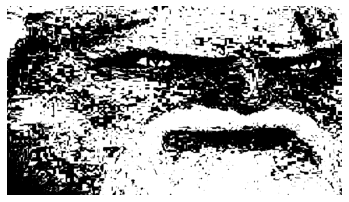

In [52]:
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

### Binarizing Images

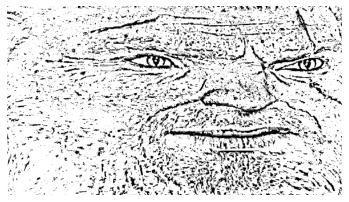

In [58]:
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 51
subtract_from_mean = 5

image_binarized = cv2.adaptiveThreshold(image,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

### Removing Backgrounds

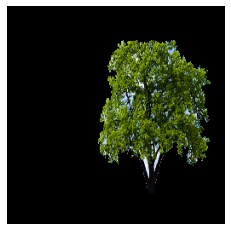

In [83]:
# Load image and convert to RGB
tree_bgr = cv2.imread('images/tree.jpg')
tree_rgb = cv2.cvtColor(tree_bgr, cv2.COLOR_BGR2RGB)
tree_x256 = cv2.resize(tree_rgb, (256, 256))

# Rectangle values: start x, start y, width, height
rectangle = (80, 40, 256, 180)

# Create initial mask
mask = np.zeros(tree_x256.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(tree_x256, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = tree_x256 * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

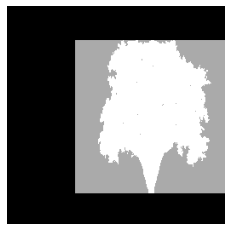

In [84]:
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

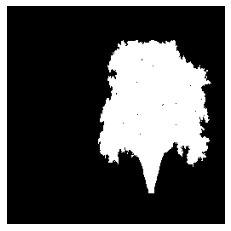

In [85]:
plt.imshow(mask_2, cmap="gray"), plt.axis("off")
plt.show()

In [87]:
# Save tree
cv2.imwrite("images/tree_256x256.jpg", tree_x256)

True

### Detecting Edges

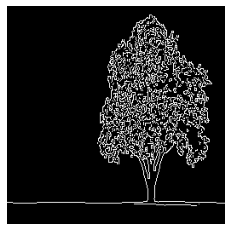

In [89]:
tree_gray = cv2.imread("images/tree_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(tree_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(tree_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

### Corners
#### Harris

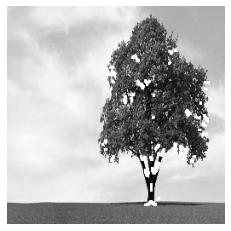

In [91]:
# Load image as grayscale
image_bgr = cv2.imread("images/tree_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02

image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

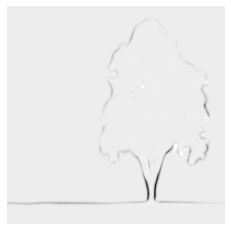

In [93]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

#### Shi-Tomasi

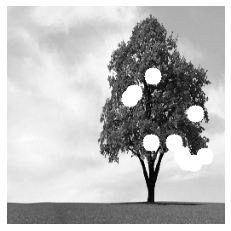

In [96]:
# Load images
image_bgr = cv2.imread('images/tree_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 2

# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)

corners = np.float32(corners)

# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (int(x),int(y)), 10, (255,255,255), -1)
    
# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

### Features for ML

In [97]:
# Load image as grayscale
image = cv2.imread("images/tree_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()

array([205, 235, 237, 234, 231, 239, 202, 175, 178, 175, 212, 204, 191,
       202, 226, 244,  81, 125, 179, 179, 215, 222, 216, 222, 244,  75,
        92, 161, 199, 185, 221, 239, 241, 229, 244,  62,  46,  22,  57,
       199, 232, 230, 238, 240, 154, 102,  15,  54,  25, 237, 236, 239,
       233, 226,  77,  56,  64,  49,  54, 205, 243, 244, 238, 233,  85,
        81,  23,  57,  10, 242, 230, 234, 230, 226, 241, 240, 167, 225,
       221, 221, 234, 236, 239, 235, 226, 212,  24, 215, 213, 212, 103,
       100,  85,  89,  98, 103,  96, 110, 107, 111], dtype=uint8)

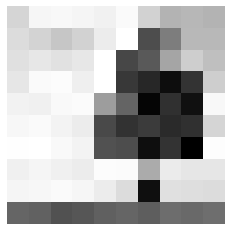

In [98]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

### Mean Color as a Feature

In [3]:
# Load image as BGR
image_bgr = cv2.imread("images/wide_gerka.jpg", cv2.IMREAD_COLOR)

# Calculate the mean of each channel
channels = cv2.mean(image_bgr)

# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])

# Show mean channel values
observation

array([[108.03001085,  58.94558919,  31.67362847]])

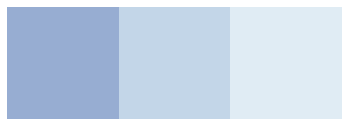

In [20]:
# Show image
plt.imshow(observation, cmap="BuPu", vmin=0, vmax=255), plt.axis("off")
plt.show()

In [6]:
cv2.imwrite("obs.jpg", observation)

True

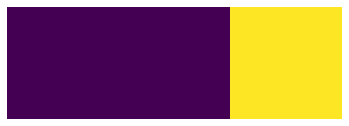

In [16]:
xxx = np.array([[0, 5, 10000]])

plt.imshow(xxx), plt.axis("off")
plt.show()

### Color Histograms as Features

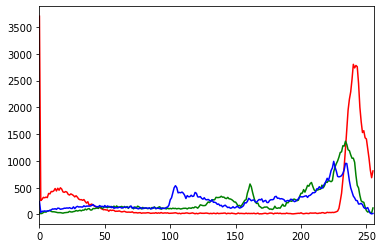

In [102]:
# Load image
image_bgr = cv2.imread("images/tree_256x256.jpg", cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    
    features.extend(histogram)
    
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
    
# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
#observation[0:5]
plt.show()